<a href="https://colab.research.google.com/github/zs-nemecz/ExperimentalMethodsClass/blob/master/Leiro_Stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Leíró statisztika

##Kísérletezés módszertana 2020/02
Oktató: Nemecz Zsuzsanna

Neptun kód: PSZB17-132:1

In [1]:
# A szükséges könyvtárak importálása
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as sp

##Középértékek: Átlag, Medián, Módusz

In [2]:
# Átlag
adatsor = [1.5, 3,3, 2.5, 2.7, 3.1, 1.5, 13.9, 3.7, 2.2, 3.8, 0.6, 1.5,4.3,5.2, 10.2, 10.6, 13.1,]
atlag = np.mean(adatsor)
print('Átlag:', atlag)

Átlag: 4.8


In [3]:
# Medián: helyzeti középérték, tehát a sorba rendezett adatsor közepén lévő elem
med = np.median(adatsor)
print('Medián', med)

Medián 3.05


In [4]:
# Módusz: a leggyakoribb elem
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html
modusz, elemszam = sp.mode(adatsor) # ez a mode funkció két elemmel tér vissza, az egyik a leggyakoribb elemek listája, a másik a leggyakoribb elemek számának listája
print('Módusz', modusz[0])
print('Módusz elemszáma:', elemszam[0])

Módusz 1.5
Módusz elemszáma: 3


Vegyük szemre az adatsort

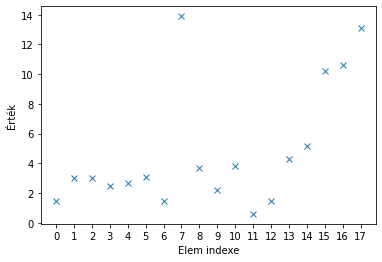

In [12]:
# Felhődiagram (scatter plot)
x = np.arange(0, len(adatsor), 1, dtype=int)
y = np.array(adatsor) # a listából tömböt csinálok, amely alkalmasabb az adatelemzésre
plt.plot(x,y, 'x')
plt.xlabel('Elem indexe')
plt.xticks(x)
plt.ylabel('Érték')
plt.show()

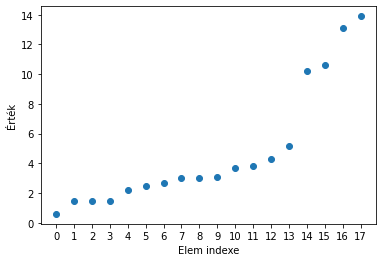

In [11]:
# Felhődiagram az adatok sorba rendezése után
y.sort() # sorba rendezés
plt.plot(x,y, 'o')
plt.xlabel('Elem indexe')
plt.xticks(x)
plt.ylabel('Érték')
plt.show()


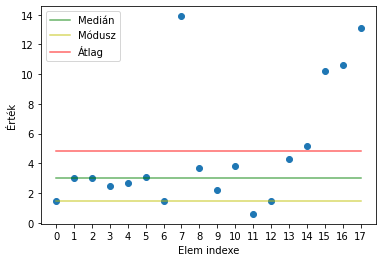

In [19]:
# Ábrázoljuk a középértékeket a felhődiagramra vetítve
plt.plot(x,y, 'o')
plt.xlabel('Elem indexe')
plt.xticks(x)
plt.ylabel('Érték')
# az np.full funkció segítségével egy tömb struktúrát hozunk létre, hogy a középértékeket vonalként ábrázolhassuk
plt.plot(x, np.full(y.shape,med), 'g', label='Medián', alpha=0.6) 
plt.plot(x, np.full(y.shape,modusz), 'y', label='Módusz', alpha=0.6)
plt.plot(x, np.full(y.shape,atlag), 'r', label='Átlag', alpha=0.6)
plt.legend() # az adatcímkék kiírása
plt.show()

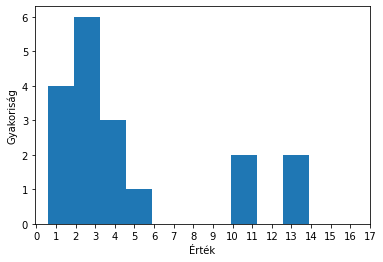

In [22]:
# A hisztogramról leolvasható az értékek eloszlása 
plt.hist(y) 
plt.xlabel('Érték')
plt.xticks(x)
plt.ylabel('Gyakoriság')
plt.show()

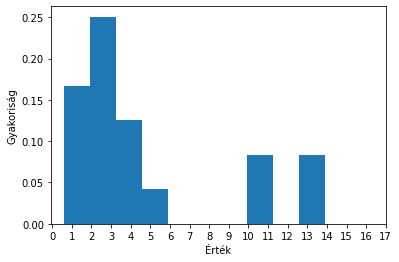

In [23]:
# A hisztogramról leolvasható az értékek eloszlása 
plt.hist(y, density=True) 
plt.xlabel('Érték')
plt.xticks(x)
plt.ylabel('Gyakoriság')
plt.show()

## Szóródási mutatók

In [24]:
# Terjedelem (range)
minimum = np.min(y)
maximum = np.max(y)
terjedelem = maximum - minimum 
print('Az adatsorban a minimum érték {}, a maximum érték {}, a terjedelem pedig {}.'. format(minimum, maximum, terjedelem))

Az adatsorban a minimum érték 0.6, a maximum érték 13.9, a terjedelem pedig 13.3.


In [30]:
# Szórás (standard deviation)
szoras = np.std(y)
# Variancia
variancia = np.var(y)
# Interkvantilis terjedelem (Q1-Q3, ahol Q1 a sorba rendezett adatsor első felének középső eleme, Q3 pedig a második felének a középső eleme)
interkv = sp.iqr(y)
print('Az adatok szórása {}, a variancia {}, az interkvartilis terjedelem pedig {}'. format(szoras, variancia, interkv))

Az adatok szórása 4.0363624988623386, a variancia 16.29222222222222, az interkvartilis terjedelem pedig 2.7


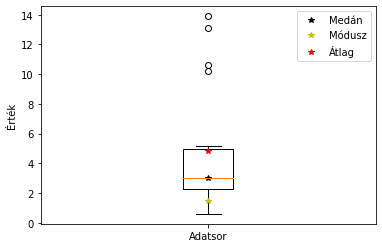

In [36]:
# A szóródás ábrázolása boxplottal (doboz ábra):
# a doboz alja és teteje az interkvantilis terjedelmet ábrázolják
# a doboz közepén lévő vonal a mediánt jelöli (ezért esik egybe a zöld csillaggal)
bxplt = plt.boxplot(y, labels=['Adatsor'])
plt.ylabel('Érték')
plt.plot(1, med, 'k*', label='Medán')
plt.plot(1, modusz, 'y*', label='Módusz')
plt.plot(1, atlag, 'r*', label='Átlag')
plt.legend()
plt.show()

##Többváltozó elemzés

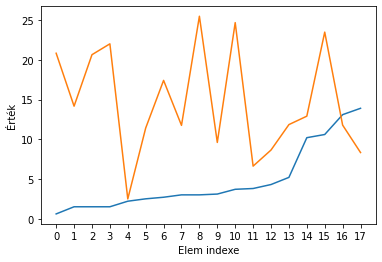

In [37]:
# Generáljunk egy adatsort, amely normális eloszlású, átlaga 13, szórása 6, és olyan hosszúságú, mint az eredeti y adatsorounk
y_2 =  np.random.normal(13, scale=6, size=y.shape) 
plt.plot(x, y)
plt.plot(x, y_2)
plt.xlabel('Elem indexe')
plt.xticks(x)
plt.ylabel('Érték')
plt.show()

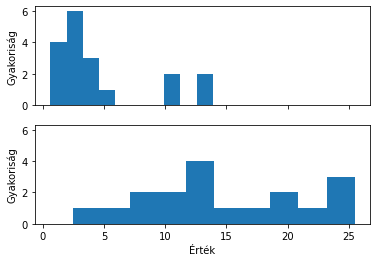

In [43]:
#Ábrázoljuk a két változó eloszlását hisztogramon
figure, axs = plt.subplots(2, sharex=True, sharey=True)
axs[0].hist(y)
axs[0].set(ylabel='Gyakoriság')
axs[1].hist(y_2)
axs[1].set(xlabel='Érték', ylabel='Gyakoriság')
plt.show()

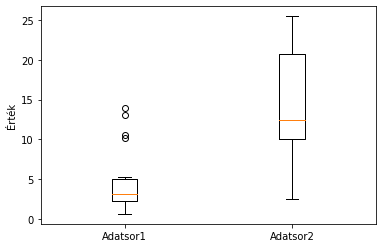

In [45]:
plt.boxplot([y, y_2], labels=['Adatsor1', 'Adatsor2'])
plt.ylabel('Érték')
plt.show()